In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Đọc hết ảnh 

In [ ]:

import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/data/images.csv')
Y=pd.read_csv('/content/drive/MyDrive/Machine Learning/data/labels.csv')

#Tạo hog

https://viblo.asia/p/tim-hieu-ve-phuong-phap-mo-ta-dac-trung-hog-histogram-of-oriented-gradients-V3m5WAwxZO7

In [ ]:
#Thử lại data 
def hog(img_gray, cell_size=8, block_size=2, bins=9):
    img = img_gray
    h, w = img.shape # 32, 32
    
    # gradient
    xkernel = np.array([[-1, 0, 1]])
    ykernel = np.array([[-1], [0], [1]])
    dx = cv2.filter2D(img, cv2.CV_32F, xkernel)
    dy = cv2.filter2D(img, cv2.CV_32F, ykernel)
    
    # histogram
    magnitude = np.sqrt(np.square(dx) + np.square(dy)) #Cường độ Gradient 
    orientation = np.arctan(np.divide(dy, dx+0.00001)) # radian
    orientation = np.degrees(orientation) # -90 -> 90
    orientation += 90 # 0 -> 180
    
    num_cell_x = w // cell_size 
    num_cell_y = h // cell_size 
    hist_tensor = np.zeros([num_cell_y, num_cell_x, bins]) 
    for cx in range(num_cell_x):
        for cy in range(num_cell_y):
            ori = orientation[cy*cell_size:cy*cell_size+cell_size, cx*cell_size:cx*cell_size+cell_size]
            mag = magnitude[cy*cell_size:cy*cell_size+cell_size, cx*cell_size:cx*cell_size+cell_size]
            hist, _ = np.histogram(ori, bins=bins, range=(0, 180), weights=mag) # 
            hist_tensor[cy, cx, :] = hist
        pass
    pass
    
    # normalization
    redundant_cell = block_size-1
    feature_tensor = np.zeros([num_cell_y-redundant_cell, num_cell_x-redundant_cell, block_size*block_size*bins])
    for bx in range(num_cell_x-redundant_cell):
        for by in range(num_cell_y-redundant_cell): 
            by_from = by
            by_to = by+block_size
            bx_from = bx
            bx_to = bx+block_size
            v = hist_tensor[by_from:by_to, bx_from:bx_to, :].flatten() 
            feature_tensor[by, bx, :] = v / LA.norm(v, 2)
            # avoid NaN:
            if np.isnan(feature_tensor[by, bx, :]).any():
                feature_tensor[by, bx, :] = v
    
    return feature_tensor.flatten() 
from numpy import linalg as LA
import numpy as np
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow


In [ ]:
data=np.array(data, dtype=np.uint8)
data_raw=data.reshape(data.shape[0],32,32,3)
hog_image=[]
for i in range(len(data_raw)):
  hog_image.append(hog(cv2.cvtColor(data_raw[i], cv2.COLOR_BGR2GRAY)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


In [ ]:
hog_image=np.array(hog_image)

#3.Predict Vật thể


---







In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(hog_image,Y, test_size=0.2)


##3.1 SVC

In [ ]:
from sklearn.svm import SVC
classifier=SVC(kernel="rbf")
classifier.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

###3.1.1 The cofusion matrix 

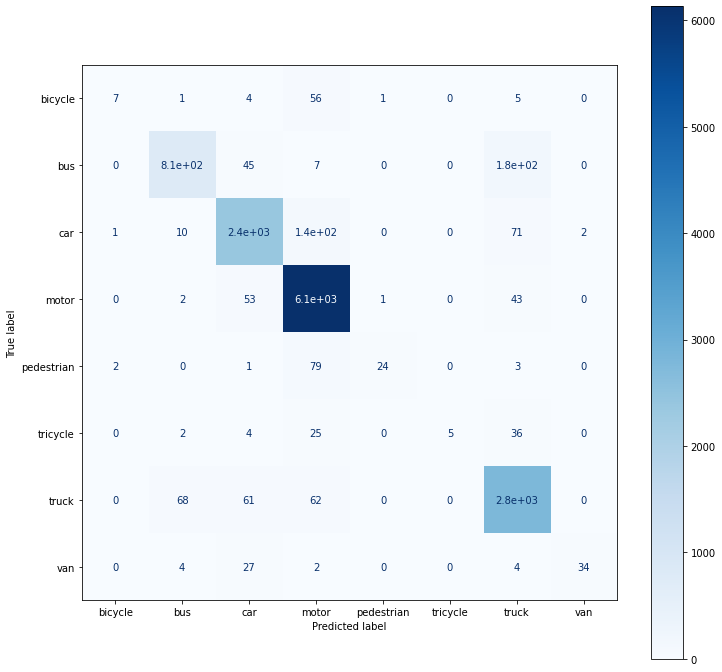

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(12, 12))
plot_confusion_matrix(classifier, X_test, y_test,cmap=plt.cm.Blues,ax=ax)
plt.show()

### 3.1.2 Score và đánh giá

In [ ]:
from sklearn.metrics import classification_report

Y_pred = loaded_model.predict(X_test)
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

     bicycle       1.00      0.22      0.36        78
         bus       0.96      0.85      0.90      1081
         car       0.96      0.95      0.95      2603
       motor       0.96      0.99      0.97      6141
  pedestrian       1.00      0.38      0.55       114
    tricycle       1.00      0.19      0.32        68
       truck       0.93      0.97      0.95      3016
         van       0.97      0.63      0.76        62

    accuracy                           0.95     13163
   macro avg       0.97      0.65      0.72     13163
weighted avg       0.95      0.95      0.95     13163



##3.2 NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
#classifier =OneVsRestClassifier(GaussianNB())
classifier = GaussianNB()
classifier.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

###3.2.1 The cofusion Matrix

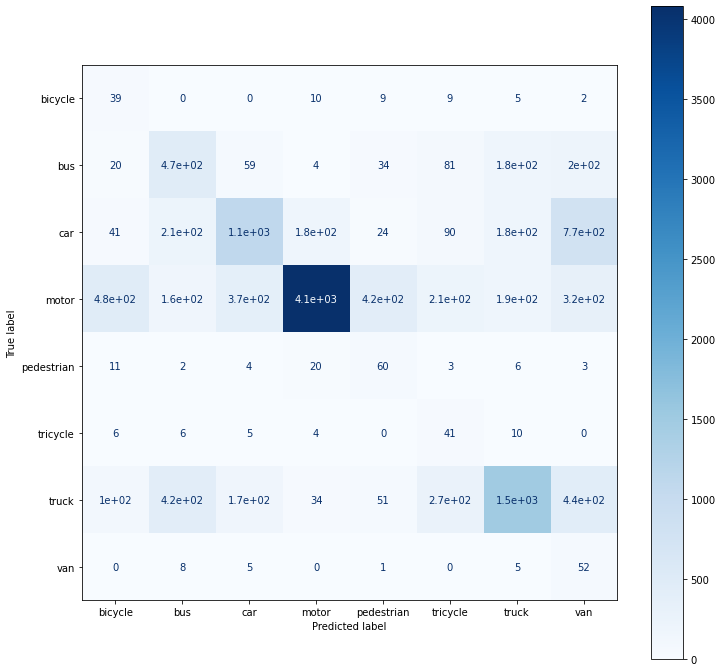

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(12, 12))
plot_confusion_matrix(classifier, X_test, y_test,cmap=plt.cm.Blues,ax=ax)
plt.show()

###3.2.2 Score và đánh giá 

In [ ]:
from sklearn.metrics import classification_report
Y_pred=loaded_model.predict(X_test)

print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

     bicycle       0.06      0.54      0.10        78
         bus       0.39      0.43      0.41      1081
         car       0.63      0.44      0.52      2603
       motor       0.95      0.66      0.78      6141
  pedestrian       0.12      0.63      0.20       114
    tricycle       0.06      0.69      0.12        68
       truck       0.73      0.50      0.59      3016
         van       0.02      0.69      0.05        62

    accuracy                           0.56     13163
   macro avg       0.37      0.57      0.35     13163
weighted avg       0.77      0.56      0.64     13163



###Save model 

In [ ]:
import pickle
import os 
os.chdir('/content/drive/MyDrive/Machine Learning/Model')
pickle.dump(classifier,open("Navie_hog.pkl","wb"))

##3.3 KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(metric='cosine')
classifier.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cosine',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

###3.3.1 The cofusion Matrix

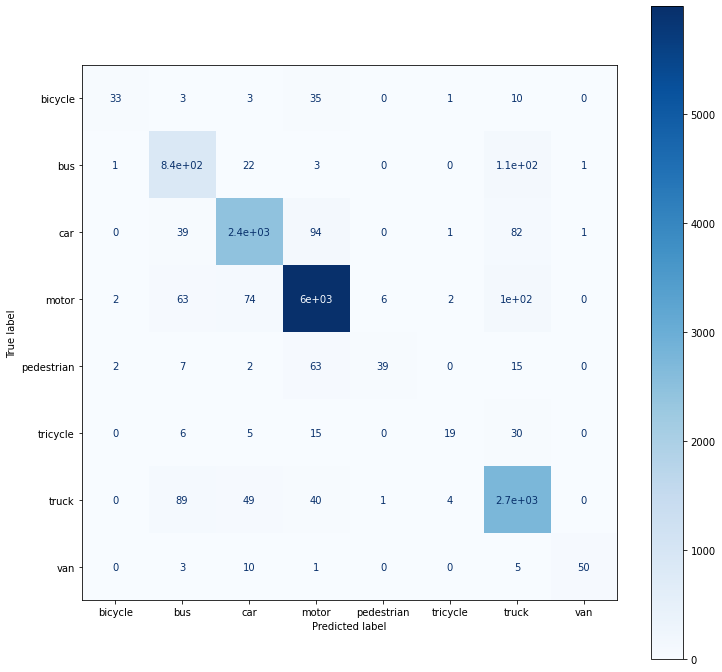

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(12, 12))
plot_confusion_matrix(classifier, X_test, y_test,cmap=plt.cm.Blues,ax=ax)
plt.show()

###3.3.2 Score và đánh giá 

In [ ]:
from sklearn.metrics import classification_report
Y_pred = classifier.predict(X_test)
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

     bicycle       0.87      0.39      0.54        85
         bus       0.80      0.86      0.83       983
         car       0.94      0.92      0.93      2667
       motor       0.96      0.96      0.96      6236
  pedestrian       0.85      0.30      0.45       128
    tricycle       0.70      0.25      0.37        75
       truck       0.88      0.94      0.91      2920
         van       0.96      0.72      0.83        69

    accuracy                           0.92     13163
   macro avg       0.87      0.67      0.73     13163
weighted avg       0.92      0.92      0.92     13163



##3.4 DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = "entropy")
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

###3.4.1 The confusion Matrix

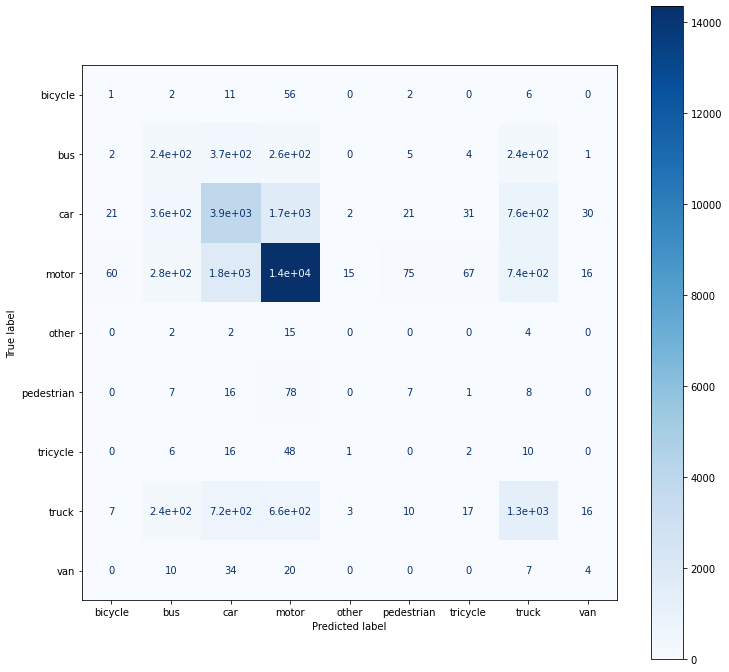

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(12, 12))
plot_confusion_matrix(classifier, X_test, y_test,cmap=plt.cm.Blues,ax=ax)
plt.show()

In [ ]:
import os 
import pickle
os.chdir('/content/drive/MyDrive/Machine Learning/Model')
vec = open("Decision Tree_hog.pkl", 'rb')
classifier = pickle.load(vec)

###3.4.2 Score và đánh giá 

In [ ]:
from sklearn.metrics import classification_report

Y_pred = classifier.predict(X_test)
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

     bicycle       1.00      0.73      0.84        78
         bus       0.95      0.85      0.90      1081
         car       0.94      0.95      0.94      2603
       motor       0.96      0.99      0.98      6141
  pedestrian       1.00      0.74      0.85       114
    tricycle       0.98      0.76      0.86        68
       truck       0.95      0.95      0.95      3016
         van       1.00      0.85      0.92        62

    accuracy                           0.95     13163
   macro avg       0.97      0.85      0.91     13163
weighted avg       0.95      0.95      0.95     13163



##3.5 RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

###3.5.1 The confusion matrix

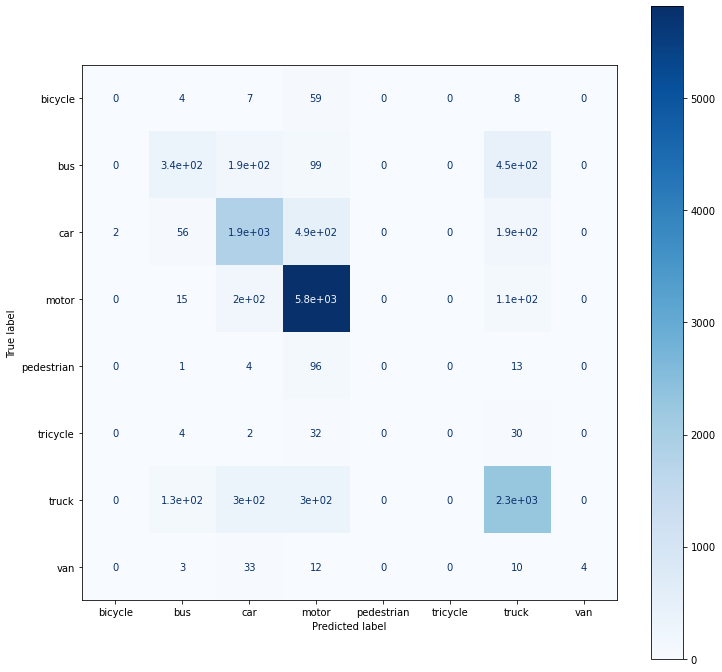

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(12, 12))
plot_confusion_matrix(classifier, X_test, y_test,cmap=plt.cm.Blues,ax=ax)
plt.show()

###3.5.2 Score và đánh giágiá

In [ ]:
import os 
import pickle
os.chdir('/content/drive/MyDrive/Machine Learning/Model')
vec = open("Random Forest_hog.pkl", 'rb')
classifier = pickle.load(vec)

In [ ]:
from sklearn.metrics import classification_report

Y_pred = classifier.predict(X_test)
print(classification_report(y_test, Y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     bicycle       0.00      0.00      0.00        78
         bus       0.62      0.32      0.42      1081
         car       0.72      0.72      0.72      2603
       motor       0.84      0.95      0.89      6141
  pedestrian       0.00      0.00      0.00       114
    tricycle       0.00      0.00      0.00        68
       truck       0.74      0.76      0.75      3016
         van       1.00      0.06      0.12        62

    accuracy                           0.78     13163
   macro avg       0.49      0.35      0.36     13163
weighted avg       0.76      0.78      0.76     13163



##3.6 LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 5)
classifier.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

###3.6.1 The confusion Matrix

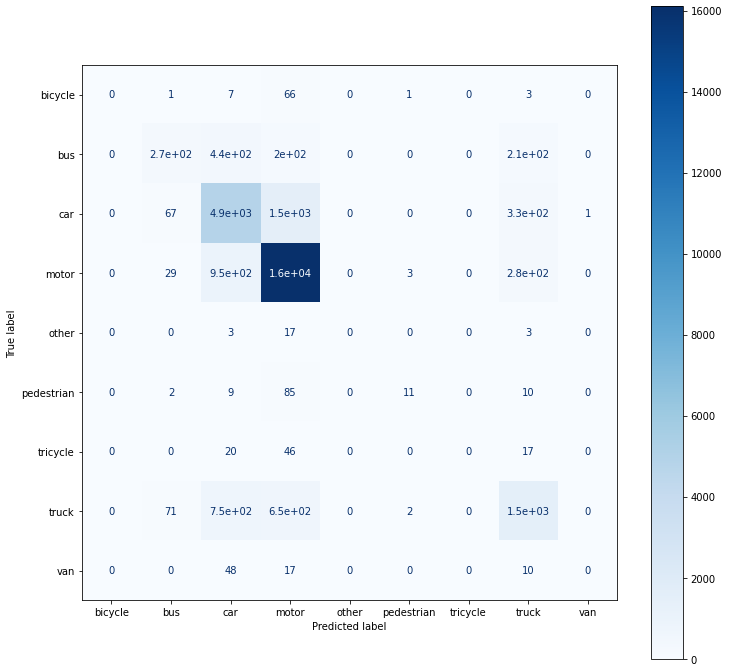

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(12, 12))
plot_confusion_matrix(classifier, X_test, y_test,cmap=plt.cm.Blues,ax=ax)
plt.show()

###3.6.2 Score và đánh giá

In [ ]:
from sklearn.metrics import classification_report
list_label=['car','motor','pedestrian','van','bus','truck','bicycle','tricycle']
Y_pred = classifier.predict(X_test)
print(classification_report(y_test, Y_pred, target_names=list_label))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         car       0.00      0.00      0.00        78
       motor       0.61      0.24      0.34      1120
  pedestrian       0.68      0.72      0.70      6784
         van       0.86      0.93      0.89     17369
         bus       0.00      0.00      0.00        23
       truck       0.65      0.09      0.16       117
     bicycle       0.00      0.00      0.00        83
    tricycle       0.63      0.50      0.56      2965
       other       0.00      0.00      0.00        75

    accuracy                           0.79     28614
   macro avg       0.38      0.28      0.30     28614
weighted avg       0.78      0.79      0.78     28614

